In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from hydrogen_plotting import generate_orbital_contour_plot, generate_orbital_volume_plot
from hydrogen_calculations import get_xyz_arrays, get_trig_angle_arrays, complex_array_to_rgb, hydrogen_wavefunction_trig_angles

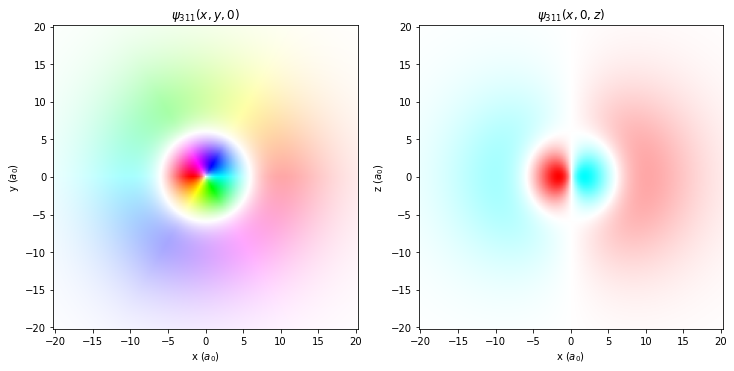

In [6]:
# Make and save z + y 2d slice figure for (n, l, m) = (3, 1, 1)

figure_dir = Path(Path.cwd(), 'figures', 'orbitals', 'wikipedia', 'examples')
figure_dir.mkdir(exist_ok=True, parents=True)
file_name = '3_1_1 zslice yslice.png'
file_path = Path(figure_dir, file_name)

(n, l, m) = (3, 1, 1)
span = (1.5 * n)**2
n_steps = 201
x, y, z, _ = get_xyz_arrays(span=span, n_steps=n_steps, sinh_scale=False)
r, cos_theta, cos_phi, sin_phi = get_trig_angle_arrays(x, y, z)
psi = hydrogen_wavefunction_trig_angles(n, l, m, r, cos_theta, cos_phi, sin_phi)
rgb = complex_array_to_rgb(psi, mag_maps_to='s')

center_idx = int(np.floor(n_steps / 2))

fig = plt.figure(figsize=[6*2, 6])
ax_z_slice = fig.add_subplot(1, 2, 1)
ax_y_slice = fig.add_subplot(1, 2, 2)

z_slice = np.transpose(rgb[:, :, center_idx, :], axes=[1, 0, 2])
y_slice = np.transpose(rgb[:, center_idx, :, :], axes=[1, 0, 2])

ax_z_slice.imshow(z_slice, extent=[-span, span, -span, span], aspect=1, origin='lower')
ax_z_slice.set_xlabel('x ($a_0$)')
ax_z_slice.set_ylabel('y ($a_0$)')
ax_z_slice.set_title('$\psi_{311}(x, y, 0)$')

ax_y_slice.imshow(y_slice, extent=[-span, span, -span, span], aspect=1, origin='lower')
ax_y_slice.set_xlabel('x ($a_0$)')
ax_y_slice.set_ylabel('z ($a_0$)')
ax_y_slice.set_title('$\psi_{311}(x, 0, z)$')

plt.show()
fig.savefig(file_path)

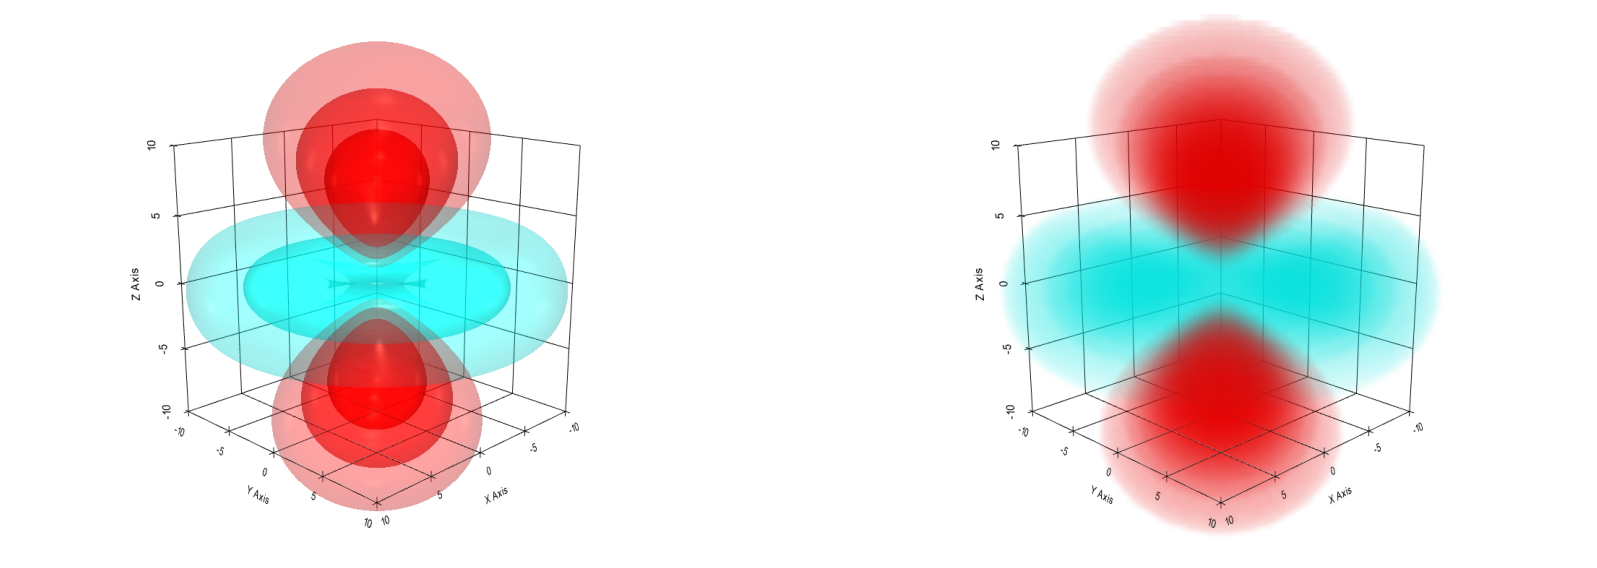

In [13]:
figure_dir = Path(Path.cwd(), 'figures', 'orbitals', 'wikipedia', 'examples')
figure_dir.mkdir(exist_ok=True, parents=True)

(n, l, m) = (3, 2, 0)
grid_span = 10
grid_bounds = [-grid_span, grid_span, -grid_span, grid_span, -grid_span, grid_span]
cam_r = 55
cam_theta = 3 * np.pi / 8
cam_phi = 0
cam_x, cam_y, cam_z = cam_r * np.array([np.sin(cam_theta) * np.cos(cam_phi), np.sin(cam_theta) * np.cos(cam_phi), np.cos(cam_theta)])
camera_position = [cam_x, cam_y, cam_z]

multi_iso_file_name = '3_2_0 multi_iso.png'
multi_iso_path = Path(figure_dir, multi_iso_file_name)
_ = generate_orbital_contour_plot(n, l, m, n_steps=151, prob_threshold_list=(0.2, 0.5, 0.8,), 
                              clip=False, clip_ghost=False, clip_axes='xyz', show_grid=True,
                              sinh_scale=True, mag_maps_to='a', real_version=False,
                              show=False, save_plot=True, save_path=multi_iso_path,
                              grid_bounds=grid_bounds,
                              camera_position=camera_position)

volume_file_name = '3_2_0 volume.png'
volume_path = Path(figure_dir, volume_file_name)
_ = generate_orbital_volume_plot(n, l, m, n_steps=101, real_version=False, 
                                 sinh_scale=False, show_grid=True,
                                 save_plot=True, save_path=volume_path, show=False,
                                 grid_bounds=grid_bounds, camera_position=camera_position)

fig = plt.figure(figsize=(8*3, 8))
ax_multi_iso = fig.add_subplot(1, 2, 1)
ax_volume = fig.add_subplot(1, 2, 2)

img = mpimg.imread(multi_iso_path)
ax_multi_iso.imshow(img)
ax_multi_iso.axis('off')

img = mpimg.imread(volume_path)
ax_volume.imshow(img)
ax_volume.axis('off')

fig.set_tight_layout(True)
plt.show()
fig.savefig(Path(figure_dir, 'multi_iso and volume.png'))

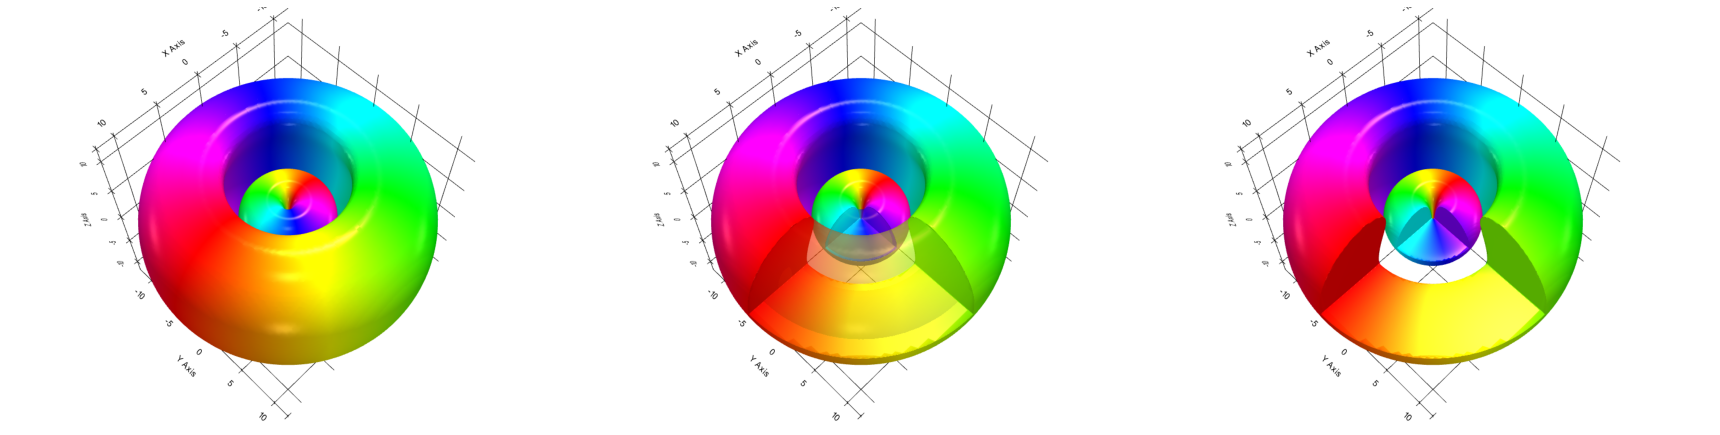

In [12]:
figure_dir = Path(Path.cwd(), 'figures', 'orbitals', 'wikipedia', 'examples')
figure_dir.mkdir(exist_ok=True, parents=True)

(n, l, m) = (3, 1, 1)
n_steps = 151
grid_span = 12
grid_bounds = [-grid_span, grid_span, -grid_span, grid_span, -grid_span, grid_span]
cam_r = 80
cam_theta = np.pi / 6
cam_phi = np.pi /4
cam_x, cam_y, cam_z = cam_r * np.array([np.sin(cam_theta) * np.cos(cam_phi), np.sin(cam_theta) * np.cos(cam_phi), np.cos(cam_theta)])
camera_position = [cam_x, cam_y, cam_z]

no_clip_file_name = '3_1_1 iso noclip.png'
no_clip_path = Path(figure_dir, no_clip_file_name)
_ = generate_orbital_contour_plot(n, l, m, n_steps=n_steps, prob_threshold_list=(0.6,), 
                              clip=False, clip_ghost=False, clip_axes='xyz', show_grid=True,
                              sinh_scale=True, mag_maps_to='', real_version=False,
                              show=False, save_plot=True, save_path=no_clip_path,
                              grid_bounds=grid_bounds,
                              camera_position=camera_position)

clip_ghost_file_name = '3_1_1 iso clip ghost.png'
clip_ghost_path = Path(figure_dir, clip_ghost_file_name)
_ = generate_orbital_contour_plot(n, l, m, n_steps=n_steps, prob_threshold_list=(0.6,), 
                              clip=True, clip_ghost=True, clip_axes='xyz', show_grid=True,
                              sinh_scale=True, mag_maps_to='', real_version=False,
                              show=False, save_plot=True, save_path=clip_ghost_path,
                              grid_bounds=grid_bounds,
                              camera_position=camera_position)

clip_no_ghost_file_name = '3_1_1 iso clip noghost.png'
clip_no_ghost_path = Path(figure_dir, clip_no_ghost_file_name)
_ = generate_orbital_contour_plot(n, l, m, n_steps=n_steps, prob_threshold_list=(0.6,), 
                              clip=True, clip_ghost=False, clip_axes='xyz', show_grid=True,
                              sinh_scale=True, mag_maps_to='', real_version=False,
                              show=False, save_plot=True, save_path=clip_no_ghost_path,
                              grid_bounds=grid_bounds,
                              camera_position=camera_position)

fig = plt.figure(figsize=(8*3, 8))
ax_noclip = fig.add_subplot(1, 3, 1)
ax_ghost = fig.add_subplot(1, 3, 2)
ax_noghost = fig.add_subplot(1, 3, 3)

img = mpimg.imread(no_clip_path)
ax_noclip.imshow(img)
ax_noclip.axis('off')

img = mpimg.imread(clip_ghost_path)
ax_ghost.imshow(img)
ax_ghost.axis('off')

img = mpimg.imread(clip_no_ghost_path)
ax_noghost.imshow(img)
ax_noghost.axis('off')


fig.set_tight_layout(True)
plt.show()
fig.savefig(Path(figure_dir, 'iso_examples.png'))

generating and saving individual orbital: (1, 0, 0)...
generating and saving individual orbital: (2, 0, 0)...
generating and saving individual orbital: (2, 1, -1)...
generating and saving individual orbital: (2, 1, 0)...
generating and saving individual orbital: (2, 1, 1)...
generating and saving individual orbital: (3, 0, 0)...
generating and saving individual orbital: (3, 1, -1)...
generating and saving individual orbital: (3, 1, 0)...
generating and saving individual orbital: (3, 1, 1)...
generating and saving individual orbital: (3, 2, -2)...
generating and saving individual orbital: (3, 2, -1)...
generating and saving individual orbital: (3, 2, 0)...
generating and saving individual orbital: (3, 2, 1)...
generating and saving individual orbital: (3, 2, 2)...
generating and saving individual orbital: (4, 0, 0)...
generating and saving individual orbital: (4, 1, -1)...
generating and saving individual orbital: (4, 1, 0)...
generating and saving individual orbital: (4, 1, 1)...
gener

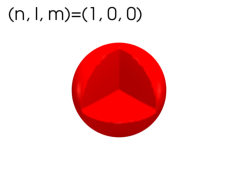

Making n=2 table...


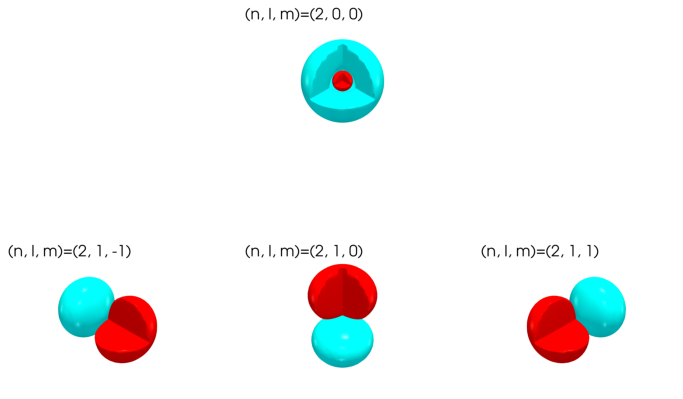

Making n=3 table...


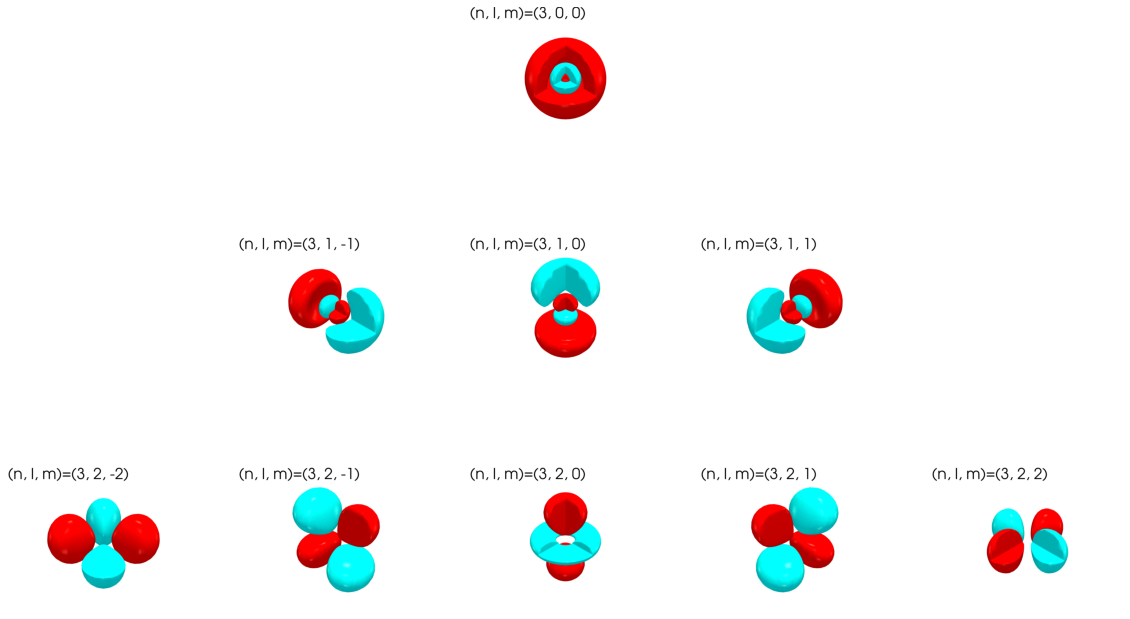

Making n=4 table...


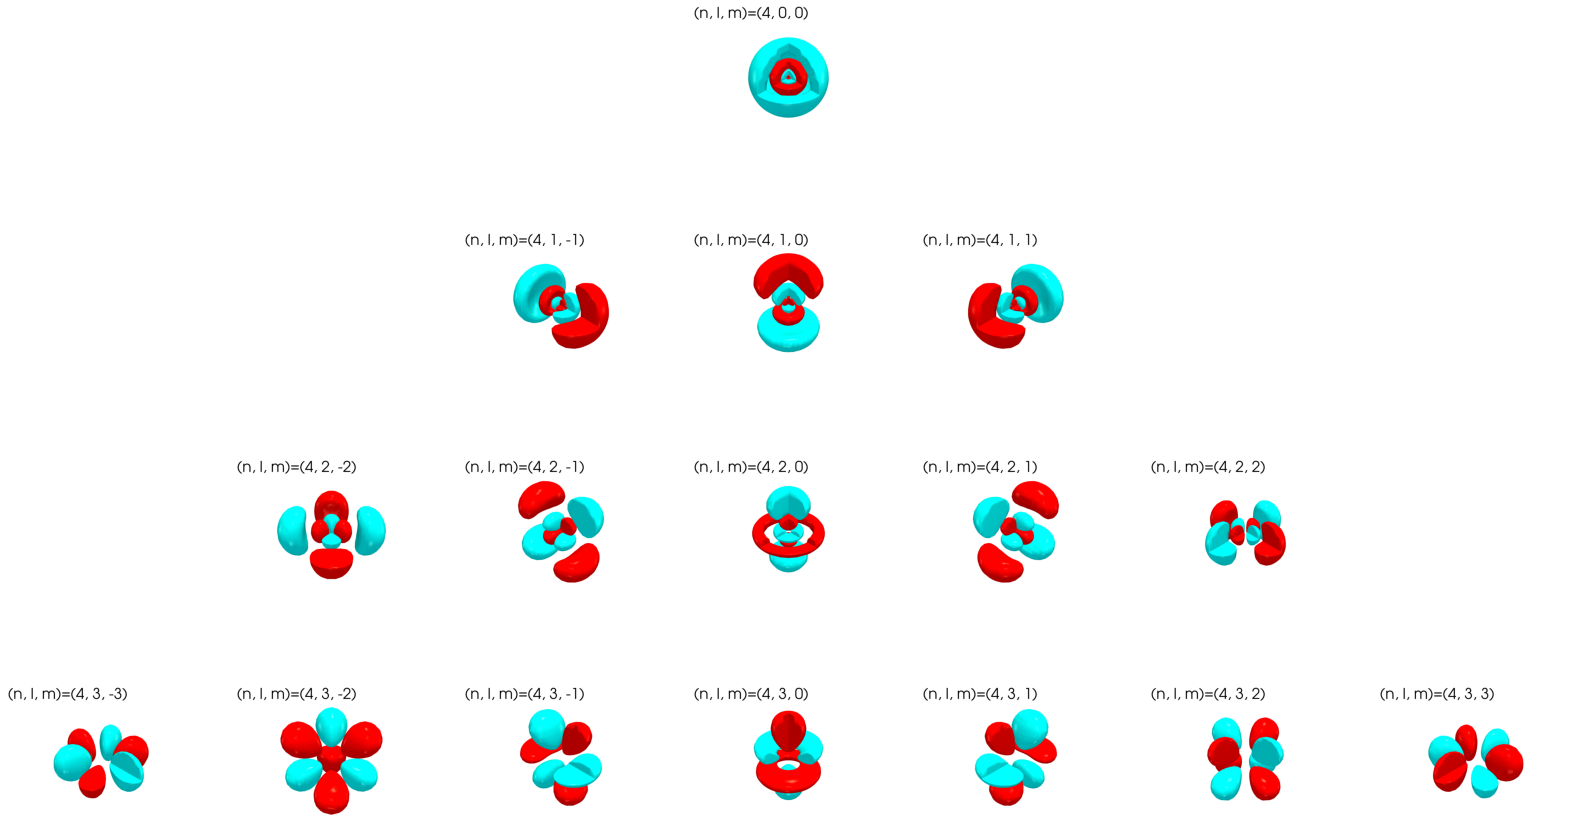

Making n=5 table...


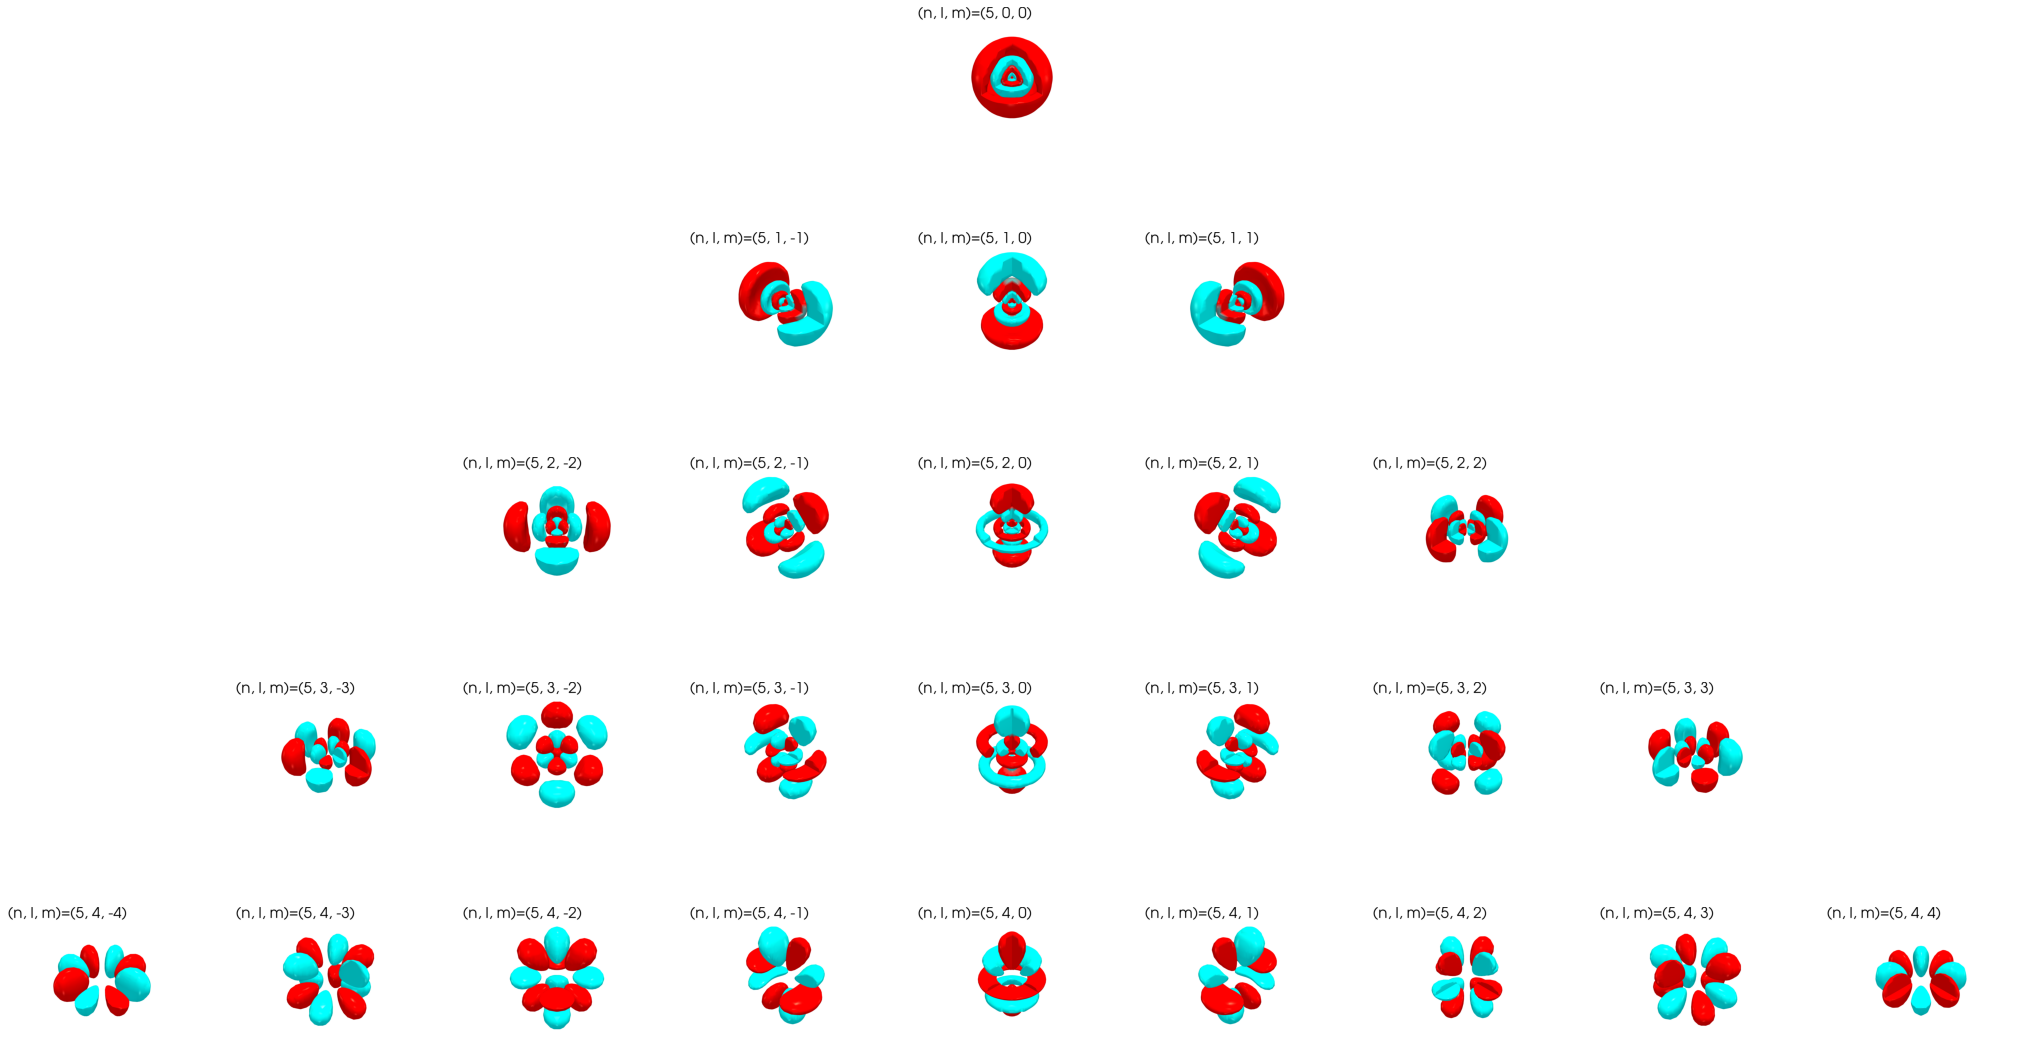

Making n=6 table...


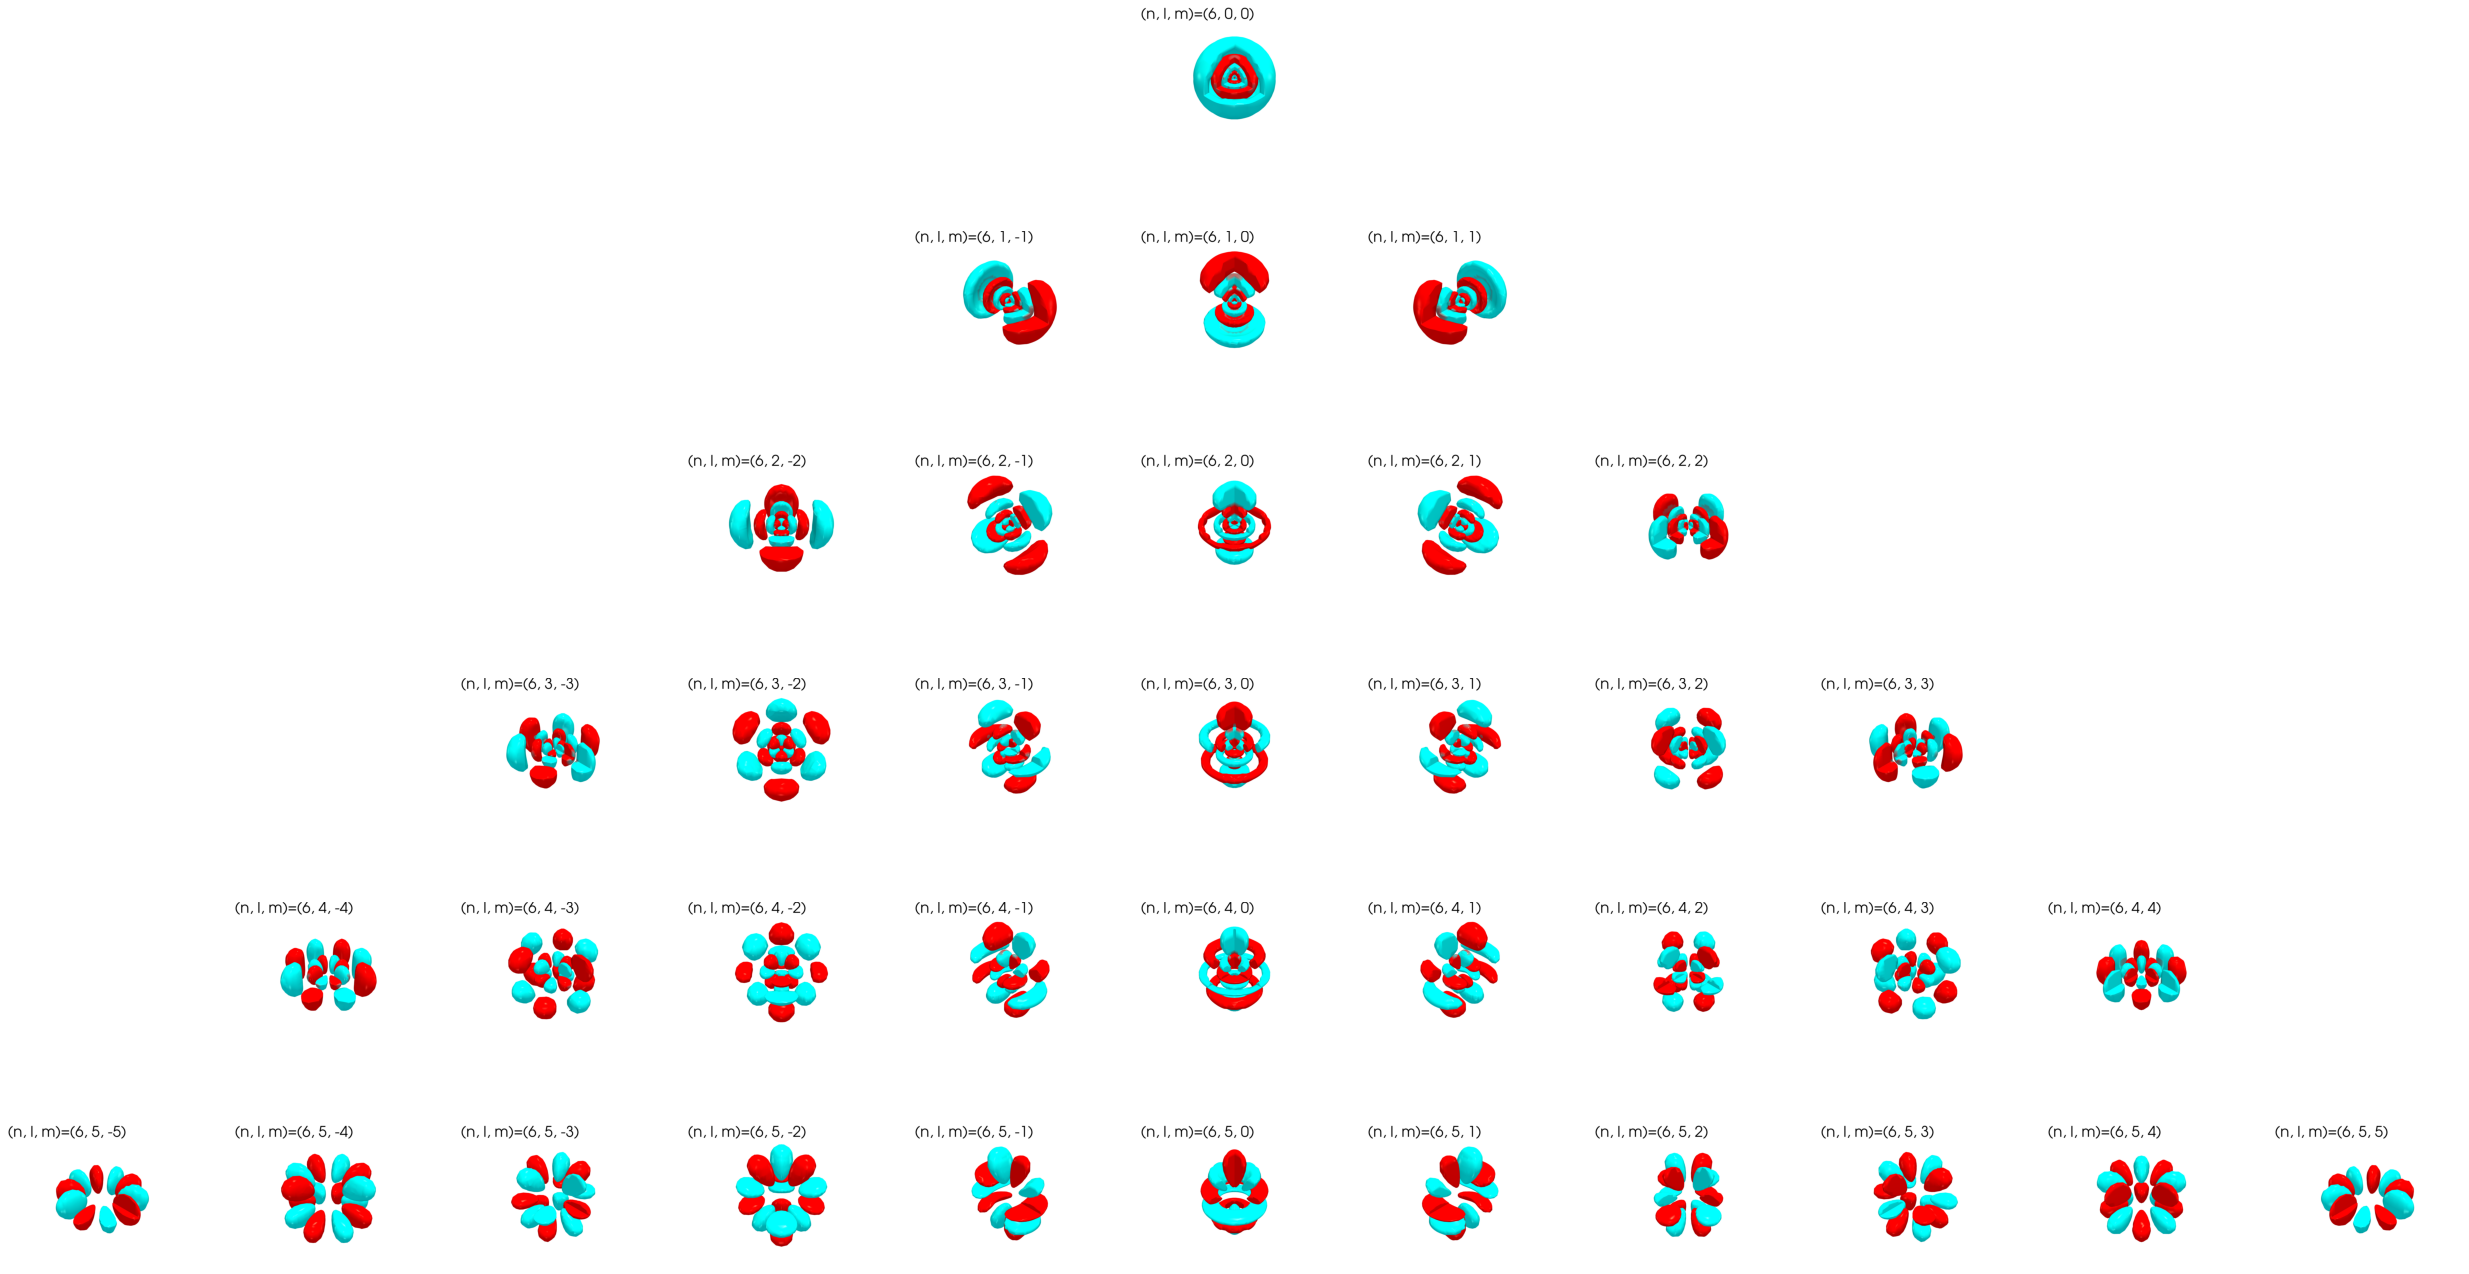

In [21]:
n_max = 6

indiv_figure_dir = Path(Path.cwd(), 'figures', 'orbitals', 'wikipedia', 'examples', 'individual_orbitals_lowres', 'real')
indiv_figure_dir.mkdir(exist_ok=True, parents=True)
table_figure_dir = Path(Path.cwd(), 'figures', 'orbitals', 'wikipedia', 'examples', 'orbital_table_lowres', 'real')
table_figure_dir.mkdir(exist_ok=True, parents=True)


for n in range(1, n_max + 1):
    for l in range(0, n):
        for m in range(-l, l+1):
            print(f'generating and saving individual orbital: ({n}, {l}, {m})...')
            file_name = f'{n}_{l}_{m}.png'
            file_path = Path(indiv_figure_dir, file_name)

            generate_orbital_contour_plot(n, l, m, n_steps=151, prob_threshold_list=(0.6,), 
                                          clip=True, clip_ghost=False, clip_axes='xyz', show_grid=False,
                                          sinh_scale=True, mag_maps_to='', real_version=True,
                                          show=False, save_plot=True, save_path=file_path,
                                          title=f'(n, l, m)=({n}, {l}, {m})')

for n in range(1, n_max + 1):
    print(f'Making n={n} table...')
    figure_name = f'{n} table'
    l_max = n - 1
    num_rows = l_max + 1
    num_cols = 2 * l_max + 1
    fig = plt.figure(figsize=(num_cols*4, num_rows*4))
    for l in range(0, l_max + 1):
        for m in range(-l, l + 1):
            img_path = Path(indiv_figure_dir, f'{n}_{l}_{m}.png')
            img = mpimg.imread(img_path)
            row = l
            col = m + l_max
            idx = row * num_cols + col + 1
            ax = fig.add_subplot(num_rows, num_cols, idx)
            ax.imshow(img)
            ax.axis('off')
    plt.show()
    fig.set_tight_layout(True)
    plt.show()
    fig.savefig(Path(table_figure_dir, f'{figure_name}.png'))

In [ ]:
n_max = 6

indiv_figure_dir = Path(Path.cwd(), 'figures', 'orbitals', 'wikipedia', 'examples', 'individual_orbitals_lowres', 'complex')
indiv_figure_dir.mkdir(exist_ok=True, parents=True)
table_figure_dir = Path(Path.cwd(), 'figures', 'orbitals', 'wikipedia', 'examples', 'orbital_table_lowres', 'complex')
table_figure_dir.mkdir(exist_ok=True, parents=True)


for n in range(1, n_max + 1):
    for l in range(0, n):
        for m in range(-l, l+1):
            print(f'generating and saving individual orbital: ({n}, {l}, {m})...')
            file_name = f'{n}_{l}_{m}.png'
            file_path = Path(indiv_figure_dir, file_name)

            generate_orbital_contour_plot(n, l, m, n_steps=151, prob_threshold_list=(0.6,), 
                                          clip=True, clip_ghost=False, clip_axes='xyz', show_grid=False,
                                          sinh_scale=True, mag_maps_to='', real_version=False,
                                          show=False, save_plot=True, save_path=file_path,
                                          title=f'(n, l, m)=({n}, {l}, {m})')

for n in range(1, n_max + 1):
    print(f'Making n={n} table...')
    figure_name = f'{n} table'
    l_max = n - 1
    num_rows = l_max + 1
    num_cols = 2 * l_max + 1
    fig = plt.figure(figsize=(num_cols*4, num_rows*4))
    for l in range(0, l_max + 1):
        for m in range(-l, l + 1):
            img_path = Path(indiv_figure_dir, f'{n}_{l}_{m}.png')
            img = mpimg.imread(img_path)
            row = l
            col = m + l_max
            idx = row * num_cols + col + 1
            ax = fig.add_subplot(num_rows, num_cols, idx)
            ax.imshow(img)
            ax.axis('off')
    plt.show()
    fig.set_tight_layout(True)
    plt.show()
    fig.savefig(Path(table_figure_dir, f'{figure_name}.png'))